In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
from torchvision.io import read_image
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision.transforms import Resize

# Image dataloader from a csv file/dataframe



https://www.kaggle.com/c/plant-pathology-2021-fgvc8

In [ ]:
image_path = '../input/plant-pathology-2021-fgvc8/train_images'

df = pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv')
train_df , val_df = train_test_split(df)

In [ ]:
class CustomImageDataset_from_csv(Dataset):
    def __init__(self, dataframe , img_dir ,  transform = None , label_transform = None):
        self.img_labels = dataframe #pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.label_transform = label_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self , idx):
        img_path = os.path.join(self.img_dir , self.img_labels.iloc[idx, 0])
        print(img_path)
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.label_transform:
            label = self.target_transform(label)
        
        return(image, label , img_path)

In [ ]:
train_data = CustomImageDataset_from_csv(train_df , image_path , transform = Resize((224, 224)))
val_data = CustomImageDataset_from_csv(val_df , image_path , transform = Resize((224, 224)))

In [ ]:
batch_size = 4
train_dataloader = DataLoader(train_data, batch_size = batch_size , shuffle = True)
val_dataloader = DataLoader(val_data, batch_size = batch_size , shuffle = True)

In [ ]:
sample_images , sample_labels , x = next(iter(train_dataloader))

In [ ]:
img = Image.open('../input/plant-pathology-2021-fgvc8/train_images/9987460a83f7c3e6.jpg')
img = Image.open(str(x[0]))

plt.imshow(img, cmap = 'magma')

In [ ]:
img = sample_images[0] #.squeeze()
print(img.shape)
img = img.reshape(img.shape[2],img.shape[1],img.shape[0])
img.shape

In [ ]:
plt.imshow(img)

# Work in progress. Soon would add more.

# ImageLoader from folder

https://www.kaggle.com/crowww/a-large-scale-fish-dataset


https://www.kaggle.com/gpiosenka/100-bird-species?select=birds

# ImageLoader from TFRecord files

https://www.kaggle.com/nickuzmenkov/nih-chest-xrays-tfrecords
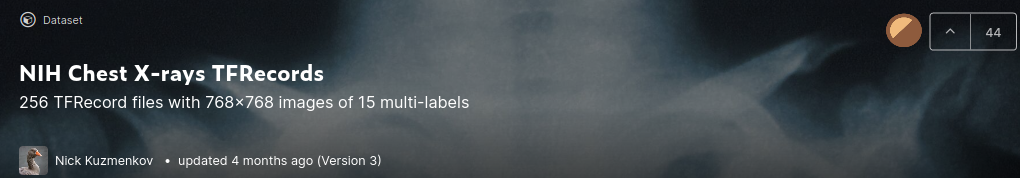

# ImageLoader - where Image pixel data is stored in csv file 

Example dataset - https://www.kaggle.com/c/Kannada-MNIST
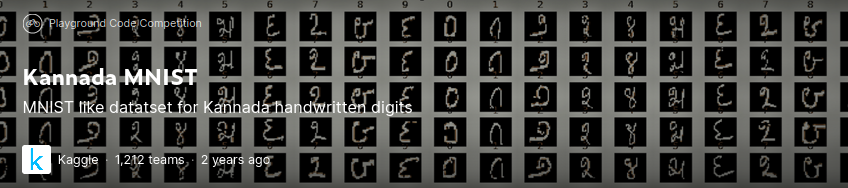